In [4]:
%load_ext autoreload
%autoreload 2

#--Colab--------
try:
    import google.colab
    IN_COLAB = True
    import os
except:
    IN_COLAB = False

if IN_COLAB and os.getcwd()=='/content':
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('drive/MyDrive/colab/telecom/stl-aclearn/')
    !pip install skorch
    !pip install modAL
#---------------

from aclearn.dataset import AcLearnDataset
from aclearn.model import AcLearnModel
import matplotlib.pyplot as plt
import seaborn as sns
import time
import copy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
size_init_per_class = 1

data_path = 'data/mnist_data.npy'
label_path = 'data/mnist_labels.npy'
mnist_dataset = AcLearnDataset(data_path, label_path, size_init_per_class=size_init_per_class)


model_uniform_mnist = AcLearnModel('uniform', dataset=copy.deepcopy(mnist_dataset))
model_max_entropy_mnist = AcLearnModel('max_entropy', dataset=copy.deepcopy(mnist_dataset))
model_bald_mnist = AcLearnModel('bald', dataset=copy.deepcopy(mnist_dataset))
model_varratio_mnist = AcLearnModel('variation_ratio', dataset=copy.deepcopy(mnist_dataset))

In [6]:
%%time

print('compute max accuracy for Mnist')
model_uniform_mnist.evaluate_max()
print(f'max accuracy: {model_uniform_mnist.max_accuracy}')

model_max_entropy_mnist.max_accuracy = model_uniform_mnist.max_accuracy
model_bald_mnist.max_accuracy = model_uniform_mnist.max_accuracy
model_varratio_mnist.max_accuracy = model_uniform_mnist.max_accuracy

compute max accuracy for Mnist
max accuracy: 0.9775
CPU times: user 16.7 s, sys: 1.44 s, total: 18.2 s
Wall time: 20.6 s


In [7]:
n_queries = 50
query_size = 50
dataset_name =  'MNIST'

for model, name in [[model_uniform_mnist, 'uniform'], [model_max_entropy_mnist, 'max entropy'],
                    [model_bald_mnist, 'bald'], [model_varratio_mnist, 'var ratio']]:
    
    print(f'--- [{dataset_name}] Training {name} :')
    time_start = time.time()
    model.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)
    delta_time = time.time()-time_start
    print(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')

--- [MNIST] Training uniform :
(query 1) Train acc: 	0.5510  |  Test acc: 	0.5545
(query 2) Train acc: 	0.6905  |  Test acc: 	0.6820
(query 3) Train acc: 	0.8196  |  Test acc: 	0.8035
(query 4) Train acc: 	0.8730  |  Test acc: 	0.8555
(query 5) Train acc: 	0.8855  |  Test acc: 	0.8820
(query 6) Train acc: 	0.9105  |  Test acc: 	0.8950
(query 7) Train acc: 	0.9095  |  Test acc: 	0.8990
(query 8) Train acc: 	0.9274  |  Test acc: 	0.9175
(query 9) Train acc: 	0.9381  |  Test acc: 	0.9230
(query 10) Train acc: 	0.9396  |  Test acc: 	0.9290
(query 11) Train acc: 	0.9421  |  Test acc: 	0.9285
(query 12) Train acc: 	0.9410  |  Test acc: 	0.9250
(query 13) Train acc: 	0.9345  |  Test acc: 	0.9215
(query 14) Train acc: 	0.9479  |  Test acc: 	0.9360
(query 15) Train acc: 	0.9461  |  Test acc: 	0.9320
(query 16) Train acc: 	0.9529  |  Test acc: 	0.9370
(query 17) Train acc: 	0.9524  |  Test acc: 	0.9385
(query 18) Train acc: 	0.9557  |  Test acc: 	0.9390
(query 19) Train acc: 	0.9577  |  Test acc

"\nprint(f'--- [{dataset_name}] Training max_entropy :')\ntime_start = time.time()\nmodel_max_entropy_mnist.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)\ndelta_time = time.time()-time_start\nprint(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')\n\nprint(f'--- [{dataset_name}] Training bald :')\ntime_start = time.time()\nmodel_bald_mnist.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)\ndelta_time = time.time()-time_start\nprint(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')\n\nprint(f'--- [{dataset_name}] Training var_ration :')\ntime_start = time.time()\nmodel_varratio_mnist.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)\ndelta_time = time.time()-time_start\nprint(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')\n"

In [15]:
size_init_per_class = 1
dataset = 'demo_fmnist'

fashion_dataset = AcLearnDataset(dataset, size_init_per_class=size_init_per_class)

model_uniform_fmnist = AcLearnModel('uniform', dataset=copy.deepcopy(fashion_dataset))
model_max_entropy_fmnist = AcLearnModel('max_entropy', dataset=copy.deepcopy(fashion_dataset))
model_bald_fmnist = AcLearnModel('bald', dataset=copy.deepcopy(fashion_dataset))
model_varratio_fmnist = AcLearnModel('variation_ratio', dataset=copy.deepcopy(fashion_dataset))

print('compute max accuracy for FashionMnist')
model_uniform_fmnist.evaluate_max()
print(f'max accuracy: {model_uniform_fmnist.max_accuracy}')

model_max_entropy_fmnist.max_accuracy = model_uniform_fmnist.max_accuracy
model_bald_fmnist.max_accuracy = model_uniform_fmnist.max_accuracy
model_varratio_fmnist.max_accuracy = model_uniform_fmnist.max_accuracy

compute max accuracy for FashionMnist
max accuracy: 0.928


In [16]:
n_queries = 50
query_size = 50
dataset_name = 'FashionMNIST'

for model, name in [[model_uniform_fmnist, 'uniform'], [model_max_entropy_fmnist, 'max entropy'],
                    [model_bald_fmnist, 'bald'], [model_varratio_fmnist, 'var ratio']]:
    
    print(f'--- [{dataset_name}] Training {name} :')
    time_start = time.time()
    model.active_learning_procedure(n_queries=n_queries, query_size=query_size, train_acc=True)
    delta_time = time.time()-time_start
    print(f'--- execution time : {int(delta_time//60)} min {delta_time%60:.0f}s\n')

--- [FashionMNIST] Training uniform :
(query 1) Train acc: 	0.4658  |  Test acc: 	0.4643
(query 2) Train acc: 	0.6108  |  Test acc: 	0.6040
(query 3) Train acc: 	0.7175  |  Test acc: 	0.7085
(query 4) Train acc: 	0.7390  |  Test acc: 	0.7296
(query 5) Train acc: 	0.7574  |  Test acc: 	0.7430
(query 6) Train acc: 	0.7597  |  Test acc: 	0.7471
(query 7) Train acc: 	0.7701  |  Test acc: 	0.7534
(query 8) Train acc: 	0.7860  |  Test acc: 	0.7716
(query 9) Train acc: 	0.7916  |  Test acc: 	0.7790
(query 10) Train acc: 	0.7883  |  Test acc: 	0.7751
(query 11) Train acc: 	0.7929  |  Test acc: 	0.7791
(query 12) Train acc: 	0.7962  |  Test acc: 	0.7792
(query 13) Train acc: 	0.8057  |  Test acc: 	0.7942
(query 14) Train acc: 	0.8040  |  Test acc: 	0.7891
(query 15) Train acc: 	0.8045  |  Test acc: 	0.7901
(query 16) Train acc: 	0.8239  |  Test acc: 	0.8095
(query 17) Train acc: 	0.8213  |  Test acc: 	0.8101
(query 18) Train acc: 	0.8175  |  Test acc: 	0.8073
(query 19) Train acc: 	0.8283  |  T

In [17]:
PATH_TO_FIGURE = 'history/figures/'

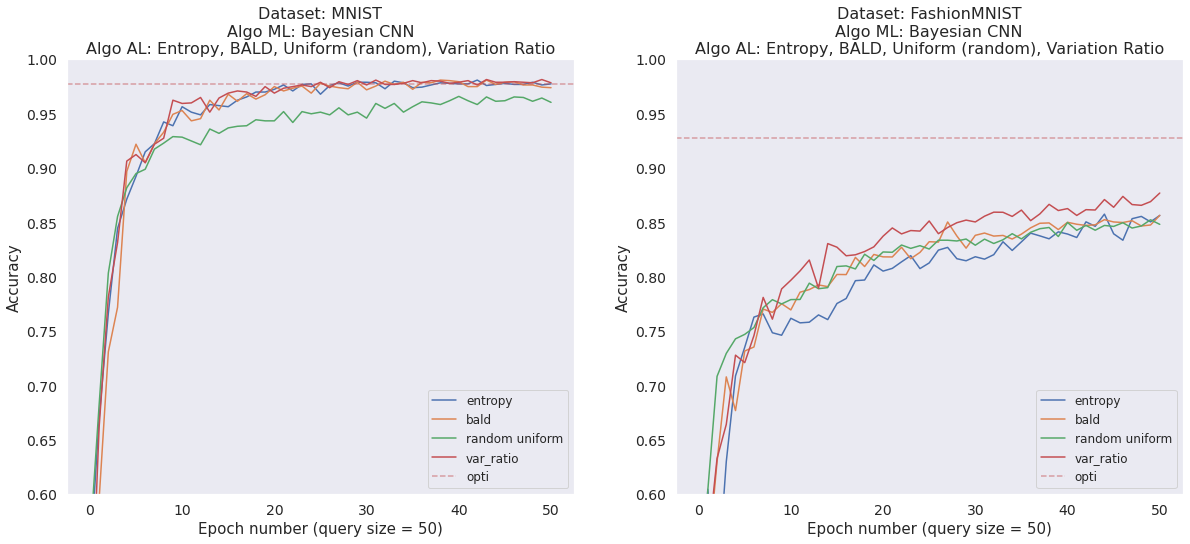

In [25]:
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.title(f'Dataset: MNIST\nAlgo ML: Bayesian CNN\nAlgo AL: Entropy, BALD, Uniform (random), Variation Ratio',fontsize=16)
plt.plot(model_max_entropy_mnist.acc_history, label='entropy')
plt.plot(model_bald_mnist.acc_history, label='bald')
plt.plot(model_uniform_mnist.acc_history, label='random uniform')
plt.plot(model_varratio_mnist.acc_history, label='var_ratio')
plt.ylim([0.6,1]);plt.grid();plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.axhline(y=model_max_entropy_mnist.max_accuracy,linestyle='--',c='r',label='opti',alpha=0.5)
plt.xlabel(f'Epoch number (query size = {query_size})',fontsize=15); plt.ylabel('Accuracy',fontsize=15)
plt.legend(fontsize=12)

plt.subplot(122)
plt.title(f'Dataset: FashionMNIST\nAlgo ML: Bayesian CNN\nAlgo AL: Entropy, BALD, Uniform (random), Variation Ratio',fontsize=16)
plt.plot(model_max_entropy_fmnist.acc_history, label='entropy')
plt.plot(model_bald_fmnist.acc_history, label='bald')
plt.plot(model_uniform_fmnist.acc_history, label='random uniform')
plt.plot(model_varratio_fmnist.acc_history, label='var_ratio')
plt.axhline(y=model_max_entropy_fmnist.max_accuracy,linestyle='--',c='r',label='opti',alpha=0.5)
plt.ylim([0.6,1]);plt.grid();plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.xlabel(f'Epoch number (query size = {query_size})',fontsize=15); plt.ylabel('Accuracy',fontsize=15)
plt.legend(fontsize=12)

plt.savefig(PATH_TO_FIGURE+'comp_aquisition_func_bis');

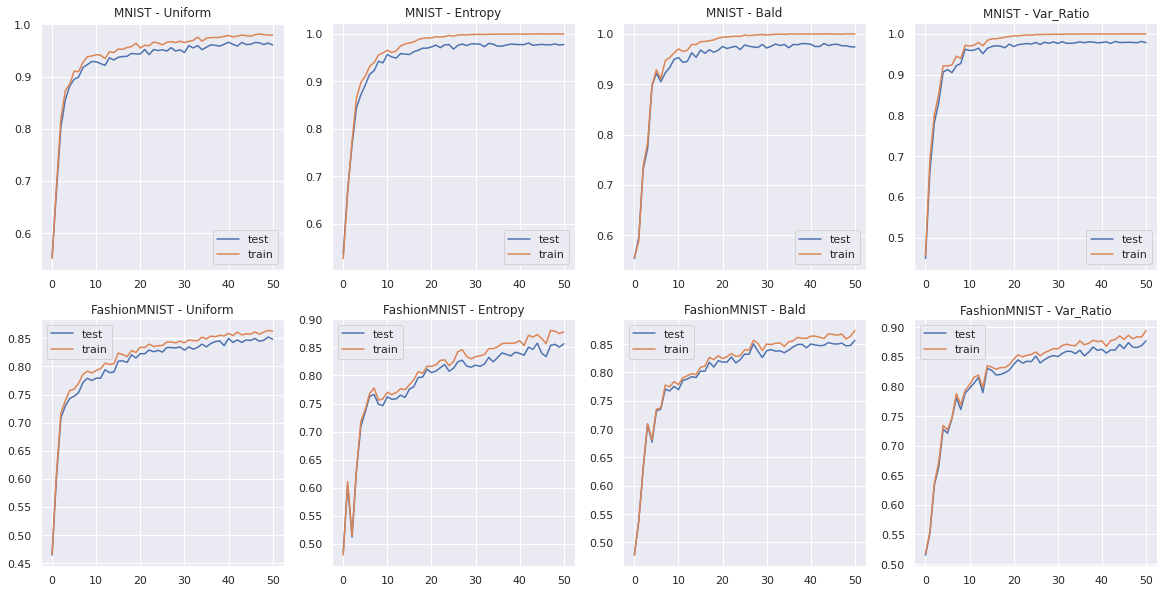

In [24]:
sns.set()
plt.figure(figsize=(20,10));

plt.subplot(241)
plt.title("MNIST - Uniform")
plt.plot(model_uniform_mnist.acc_history, label='test')
plt.plot(model_uniform_mnist.acc_train_history, label='train')
plt.legend()

plt.subplot(242)
plt.title("MNIST - Entropy")
plt.plot(model_max_entropy_mnist.acc_history, label='test')
plt.plot(model_max_entropy_mnist.acc_train_history, label='train')
plt.legend()

plt.subplot(243)
plt.title("MNIST - Bald")
plt.plot(model_bald_mnist.acc_history, label='test')
plt.plot(model_bald_mnist.acc_train_history, label='train')
plt.legend()

plt.subplot(244)
plt.title("MNIST - Var_Ratio")
plt.plot(model_varratio_mnist.acc_history, label='test')
plt.plot(model_varratio_mnist.acc_train_history, label='train')
plt.legend()

plt.subplot(245)
plt.title("FashionMNIST - Uniform")
plt.plot(model_uniform_fmnist.acc_history, label='test')
plt.plot(model_uniform_fmnist.acc_train_history, label='train')
plt.legend()

plt.subplot(246)
plt.title("FashionMNIST - Entropy")
plt.plot(model_max_entropy_fmnist.acc_history, label='test')
plt.plot(model_max_entropy_fmnist.acc_train_history, label='train')
plt.legend()

plt.subplot(247)
plt.title("FashionMNIST - Bald")
plt.plot(model_bald_fmnist.acc_history, label='test')
plt.plot(model_bald_fmnist.acc_train_history, label='train')
plt.legend()

plt.subplot(248)
plt.title("FashionMNIST - Var_Ratio")
plt.plot(model_varratio_fmnist.acc_history, label='test')
plt.plot(model_varratio_fmnist.acc_train_history, label='train')
plt.legend()

plt.savefig(PATH_TO_FIGURE+'comp_train_test_bis');